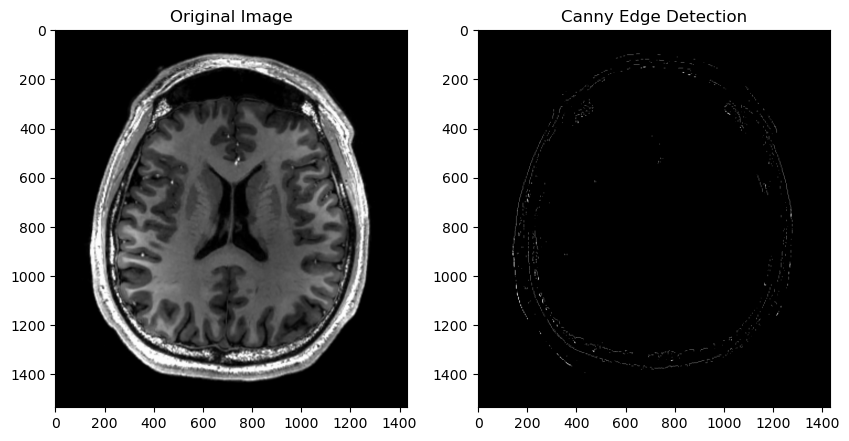

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_canny(image, low_threshold, high_threshold):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and help edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Compute the gradients using Sobel operator
    gradient_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

    # Compute the magnitude and direction of gradients
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    direction = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)

    # Non-maximum suppression
    suppressed = np.zeros_like(magnitude)
    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            angle = direction[i, j]
            q = 255
            r = 255

            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                q = magnitude[i, j + 1]
                r = magnitude[i, j - 1]
            elif 22.5 <= angle < 67.5:
                q = magnitude[i + 1, j - 1]
                r = magnitude[i - 1, j + 1]
            elif 67.5 <= angle < 112.5:
                q = magnitude[i + 1, j]
                r = magnitude[i - 1, j]
            elif 112.5 <= angle < 157.5:
                q = magnitude[i - 1, j - 1]
                r = magnitude[i + 1, j + 1]

            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                suppressed[i, j] = magnitude[i, j]

    # Hysteresis thresholding
    edges = np.zeros_like(suppressed)
    edges[(suppressed >= high_threshold)] = 255
    edges[(suppressed <= low_threshold)] = 0
    # Simplified version without having edge linking and connection
    return edges

# Read the image
image = cv2.imread('brain_mri.png')

# Check if the image is loaded successfully
if image is None:
    raise ValueError("Error: Image not loaded. Please check the file path.")

# Apply Canny edge detector
edges = apply_canny(image, low_threshold=5, high_threshold=150)

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.show()
